<a href="https://colab.research.google.com/github/hayannn/AIFFEL_MAIN_QUEST/blob/main/%5BMiniProject%5D_ARIMA%26ARCH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ARIMA

## arch 설치

In [4]:
!pip install arch==6.3.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.0/983.0 kB 16.7 MB/s eta 0:00:00


## pmdarima 설치


In [8]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 29.1 MB/s eta 0:00:00


## 사용할 라이브러리 import

- `statsmodels.graphics.tsaplots 라이브러리`의 plot_acf, plot_pacf : acf plot 및 pacf plot을 그리기 위한 라이브러리
- `statsmodels.tsa.arima_model` 라이브러리의 ARIMA : ARIMA 모델
- `pmdarima` : Auto ARIMA 모델

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

## 데이터 불러오기
- 사용하는 데이터셋 : AirPassengers.csv

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
ap = pd.read_csv('/content/drive/MyDrive/시계열/AirPassengers.csv')
ap

Month  #Passengers
0    1949-01          112
1    1949-02          118
2    1949-03          132
3    1949-04          129
4    1949-05          121
..       ...          ...
139  1960-08          606
140  1960-09          508
141  1960-10          461
142  1960-11          390
143  1960-12          432

[144 rows x 2 columns]

- Month 컬럼 삭제

In [10]:
ap.drop('Month', axis = 1, inplace = True)
ap

#Passengers
0            112
1            118
2            132
3            129
4            121
..           ...
139          606
140          508
141          461
142          390
143          432

[144 rows x 1 columns]

## 데이터 형태 확인

- 분산이 일정하지 않고, 상승 추세가 있음
- 비정상 데이터로 분류

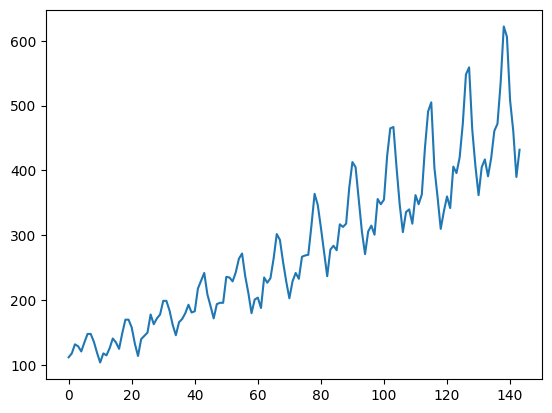

In [11]:
plt.plot(ap)
plt.show()

<br>

## 분산을 일정하게 만들기 - log transformation

- 로그 변환으로 조정

In [12]:
ap_transformed = np.log(ap)
ap_transformed

#Passengers
0       4.718499
1       4.770685
2       4.882802
3       4.859812
4       4.795791
..           ...
139     6.406880
140     6.230481
141     6.133398
142     5.966147
143     6.068426

[144 rows x 1 columns]

> ### 길이가 길수록 유의미함을 염두!

- acf plot으로 시각화해 확인
  - 점차 감소하는 형태임을 알 수 있음

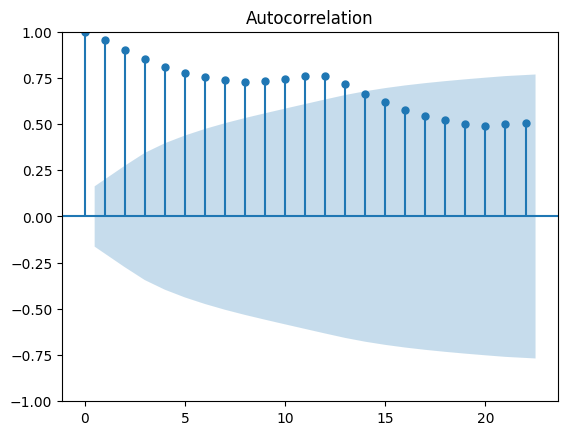

In [13]:
plot_acf(ap_transformed)
plt.plot();

- pacf plot으로 시각화해 확인
  - lag 2부분까지는 유의미함을 알 수 있음

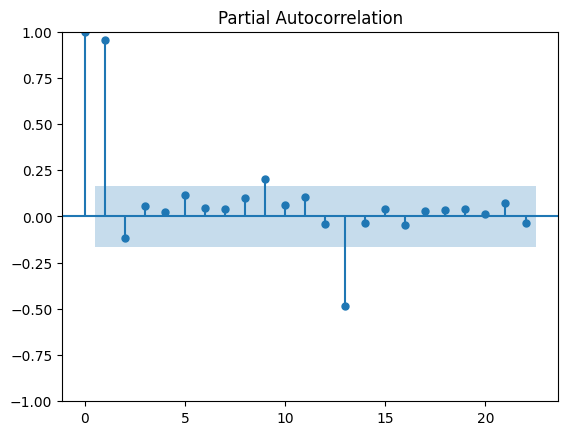

In [14]:
plot_pacf(ap_transformed)
plt.plot();

- 데이터 자체가 아직 증가 추세를 가지고 있기 때문에, acf, pacf 모두 비슷한 형태를 띄고 있다고 보면 됨!
  - 더 적합하려면 "차분"을 해야한다는 의미

<br>

## 차분 후 분석

- 차분
  - 이를 통해 추세 제거

In [22]:
ap_diff = ap_transformed.diff()
ap_diff = ap_diff.dropna() # NaN 값 날리기

- 시각화
  - lag값을 명확히 보기 위해 x축 조정
  - lag 0은 자기 자신이므로 제외
  - lag 1, lag 12 정도가 유의미

- ACF

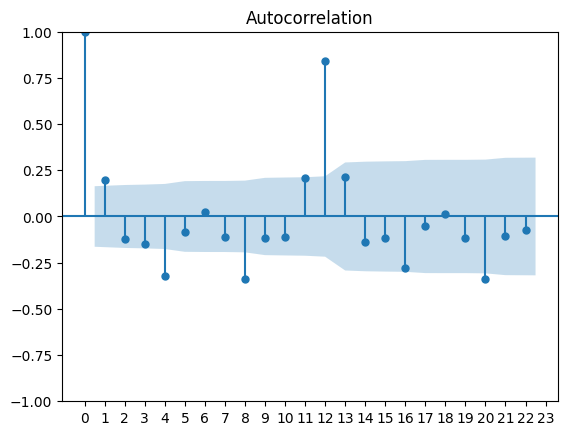

In [23]:
plot_acf(ap_diff)
plt.xticks(range(0, len(ap_diff), 1))
plt.plot();

- PACF
  - lag 1, lag 8~12 정도까지 유의미

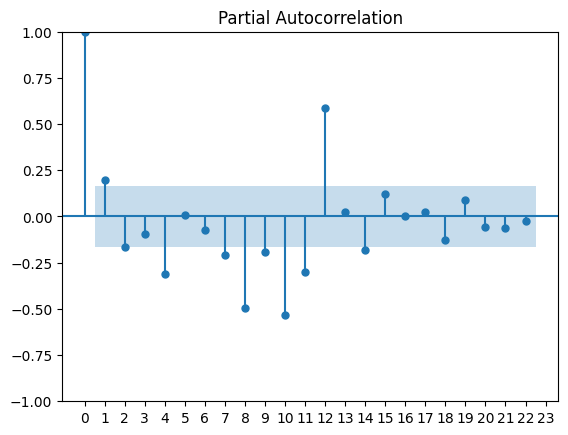

In [24]:
plot_pacf(ap_diff)
plt.xticks(range(0, len(ap_diff), 1))
plt.plot();

### 그래프가 조금 다르게 나옴
- statsmodels의 버전 차이로 인해 발생한 것으로 추측
  - LMS : 0.13.0
  - 코랩 : 0.14.4

In [25]:
import statsmodels
print(statsmodels.__version__)

0.14.4


- 0.13.0의 디폴트 값을 명시하여 다시 그래프 그려보기
  - 0.14.4 버전에서 디폴트 값이 변경되어 다르게 그려졌음을 확인했음!

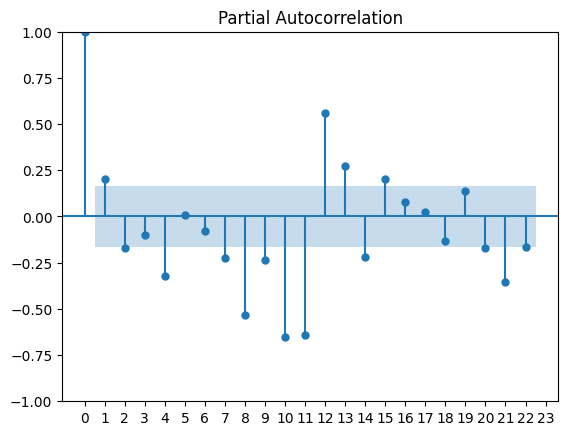

In [26]:
plot_pacf(ap_diff, method='yw', alpha=0.05)
plt.xticks(range(0, len(ap_diff), 1))
plt.plot();

> 이 시점에서 알 수 있는 것
- acf, pacf 모두 12 즈음 -> 유의미한 상관관계가 보인다는 것
- 계절성 성분으로 추측해볼 수 있음
- Auto arima를 적용할 때에 이 부분을 고려해야하지만, 이 모델이 이 값을 유의미하게 보지 않으면 ➡️ 결국 유의미하지 않을 수도 있음을 인지하고 있어야 함

# ❄️ 궁금한 부분
- ACF와 PACF의 유의미하다는 기준
  - ACF 그래프
  ![image](https://github.com/user-attachments/assets/fd4bda7e-a044-45f5-b926-8993e94eed9a)
   - "음수 부분은 유의미하지 않은 변수인건지?"
     - 파랗게 칠해져 있는 부분에서 벗어나는 값들은 유의미함을 의미하는 그래프인데, 강의에서는 ACF애서 음수 부분이 유의미하지 않다고 하여 궁금함이 생김
     - **lag 4, 8의 경우도 유의미한 값에 포함해야하는 것이 아닌지?**

  - PACF 그래프
  ![image](https://github.com/user-attachments/assets/397c2017-a753-4662-ab2a-9ae5d2b30540)
  - 이 경우, 음수값도 유의미한 것으로 판별했음

<br>

- D값을 12로 지정하기 위해 즉, 최대한 ACF와 PACF가 함께 유의미한 수치를 뽑아내기 위해 임의로 지정한 것으로 보임

<br>

> ### 참고 : ACF, PACF 차이
- ACF : 모든 시차 간 상관관계 측정, 간접 영향을 포함
- PACF : 직전 시점들의 영향을 제거, 특정 시차간 직적적 상관관계만 측정!

<br>

## ARIMA 적용

- 분산을 일정하게 하기 위해 로그 변환했던 `ap_transformed` 사용

In [27]:
ap_transformed

#Passengers
0       4.718499
1       4.770685
2       4.882802
3       4.859812
4       4.795791
..           ...
139     6.406880
140     6.230481
141     6.133398
142     5.966147
143     6.068426

[144 rows x 1 columns]

- test에 쓸 부분 분리
  - 20% 정도 자르고, 80%만 적합

In [28]:
train_size = int(len(ap_transformed)*0.8)

ap_transformed_train = ap_transformed[:train_size]
ap_transformed_test = ap_transformed[train_size:]

<br>

## Auto ARIMA 적용
- `seasonal` : False라면 -> non-seasonal model로 제한
- `suppress_warnings` : 에러 문구 ignore
- `trace` : True일 경우 오류가 발생하면 -> 그 일부 내용 출력
- `max_D` : seasonal 최대값 설정 가능

In [29]:
model = pm.AutoARIMA(seasonal = True, suppress_warnings = True, trace = True, max_D = 12, D = 12)
res = model.fit(ap_transformed_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-213.916, Time=2.63 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-189.733, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-191.035, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-192.641, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-189.957, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.49 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-216.555, Time=0.47 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-214.724, Time=0.49 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-218.097, Time=0.55 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-200.633, Time=0.32 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=-219.339, Time=0.68 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=-198.633, Time=0.58 sec
 ARIMA(5,1,3)(0,0,0)[0] intercept   : AIC=-214.474, Time=0.80 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=i

- 현재 ARIMA의 경우 `(5,1,2)`가 가장 적합
  - (결과는 달라질 수 있음!)

### 결과 분석해보기
- ARIMA(5,1,2)의 AIC : -219.339
  - 다른 경우보다 가장 낮게 측정되었기 때문에 선정됨
- Time : 0.68s
  - 시간이 과하게 길거나, 모델이 너무 복잡해지면 -> 계산 비효율성이 높아지기 때문에 이 값이 적당함
  - 과적합 방지

<br>

- confidence interval까지 도출해보기

In [30]:
# confidence interval까지 도출
preds, conf_int = res.predict(n_periods=ap_transformed_test.shape[0], return_conf_int=True)

- preds : 모델이 예측한 값
  - 29 : 예측값 개수
  - pandas의 Series 객체임
- conf_int : 예측값에 대한 신뢰 구간

In [35]:
print(preds.shape)
print(type(preds))
print('--'*40)
print(preds.shape[0])
print(type(preds.shape[0]))
print('--'*40)
print(preds)
print('--'*40)
print(conf_int)

(29,)
<class 'pandas.core.series.Series'>
--------------------------------------------------------------------------------
29
<class 'int'>
--------------------------------------------------------------------------------
115    6.202988
116    6.170074
117    6.119401
118    6.051822
119    6.019914
120    6.016473
121    6.042797
122    6.084070
123    6.129736
124    6.163914
125    6.185198
126    6.191376
127    6.189418
128    6.184415
129    6.183275
130    6.188062
131    6.199918
132    6.216198
133    6.234469
134    6.251537
135    6.266014
136    6.277226
137    6.286108
138    6.293796
139    6.301762
140    6.310814
141    6.321357
142    6.333089
143    6.345500
dtype: float64
--------------------------------------------------------------------------------
[[6.03833663 6.36763871]
 [5.94122176 6.39892679]
 [5.87655504 6.36224761]
 [5.80268547 6.30095904]
 [5.77043354 6.26939364]
 [5.76254989 6.27039606]
 [5.78307995 6.3025145 ]
 [5.82162229 6.34651871]
 [5.86684138 6.3926

- 예측 결과(preds, conf_int) 시각화해서 확인해보기
  - 파란색 부분 : 기존 train 데이터
  - 점 부분 : 원래 가지고 있던 y값
  - 점추정, 구간 추정도 모두 출력
  - 주황색 부분 : ARIMA 1,2,3이 예측한 부분
    - 추세 반영을 잘 하고 있음을 알 수 있음

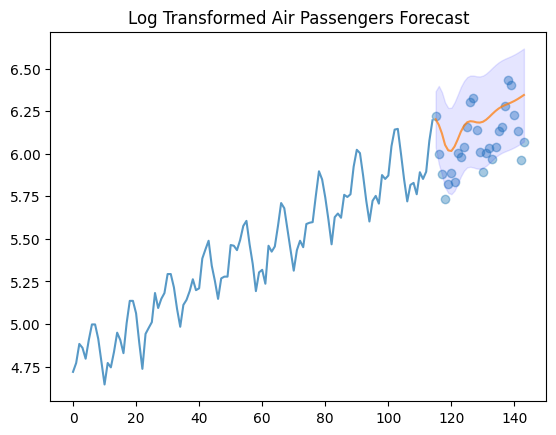

In [33]:
x_axis = np.arange(ap_transformed_train.shape[0] + ap_transformed_test.shape[0])

plt.plot(x_axis[:ap_transformed_train.shape[0]], ap_transformed_train, alpha=0.75)
plt.plot(x_axis[ap_transformed_train.shape[0]:], preds, alpha=0.75)
plt.scatter(x_axis[ap_transformed_train.shape[0]:], ap_transformed_test, alpha=0.4, marker='o')
plt.fill_between(x_axis[-preds.shape[0]:], conf_int[:, 0], conf_int[:, 1], color='b', alpha=0.1)
plt.title("Log Transformed Air Passengers Forecast")
plt.show()

<br>

#  ARCH

## 데이터 및 라이브러리 불러오기
- datetime : 날짜 및 시간 라이브러리
- arch.data.sp500 : S&P 500 데이터셋dmf arch에서 불러오는 것

In [36]:
import datetime as dt
import arch.data.sp500

## 데이터 가공 및 시각화

- 시작 날짜 : 2002-01-01로 설정
- 끝나는 날짜 : 2022-01-01로 설정
- 종가(Adj Close) 기준으로 사용

In [37]:
st = dt.datetime(2002, 1, 1)
en = dt.datetime(2022, 1, 1)
data = arch.data.sp500.load()

market = data["Adj Close"]
returns = 100 * market.pct_change().dropna()

- 수익률(Return)을 그래프로 만들기!

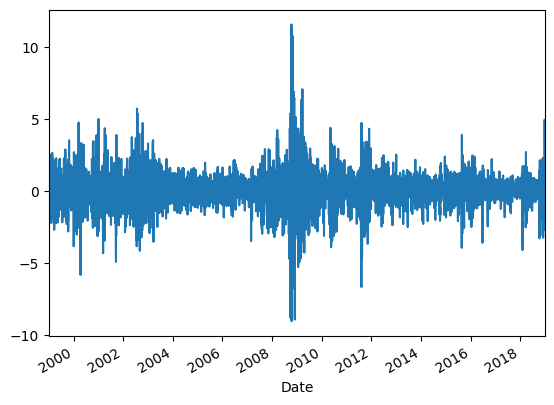

In [38]:
ax = returns.plot()
xlim = ax.set_xlim(returns.index.min(), returns.index.max())
plt.show()

- 조건부 이분산성이 발견됨
  - 독립변수와 오차항이 상관관계가 있는 경우
  - 2008년 즈음이니, 금융 위기 때문으로 추측
  - 2007년부터 2008년 : 미국에서의 부동산 버블 붕괴로 인해 세계 금융 위기가 발생되었기 때문

<br>

## ARCH에 적합해보기

- 수익률을 arch 모델에 적합
- summary 확인
  - P-value, AIC, BIC 위주로 분석

In [39]:
from arch import arch_model

am = arch_model(returns)
res = am.fit(update_freq=5)

print(res.summary())

Iteration:      5,   Func. Count:     35,   Neg. LLF: 6970.2765831170655
Iteration:     10,   Func. Count:     63,   Neg. LLF: 6936.718477482658
Optimization terminated successfully    (Exit mode 0)
            Current function value: 6936.718476988985
            Iterations: 11
            Function evaluations: 68
            Gradient evaluations: 11
                     Constant Mean - GARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -6936.72
Distribution:                  Normal   AIC:                           13881.4
Method:            Maximum Likelihood   BIC:                           13907.5
                                        No. Observations:                 5030
Date:                Wed, Dec 11 2024   Df Residuals:                     5029
Time:         

### 결과 분석
- 자동적으로 `GARCH`가 적용되었음을 알 수 있음
- P-value
   - `9.302e-07` ➡️ 0.0000009302정도로 아주 작기 때문에 통계적으로 유의미하다고 볼 수 있음
   - 평균에 대한 추정이 신뢰할 수 있다는 의미
- AIC
  - `13881.4` ➡️ 값이 작을수록 좋은 모델을 의미
  - 수치 자체로만 봤을 경우 다소 높은 것으로 추측됨
- BIC
  - `13907.5` ➡️ AIC와 유사, 작을수록 좋은 모델을 의미
  - 이 역시, 수치 자체로만 봤을 경우 다소 높은 것으로 추측

<br>

- Volatility Model을 중점적으로 해석
  - `omega`
    - p-value : 1.854e-04(0.0001854 정도)
      - 작은 값이기 떄문에 omega가 유의미함을 나타냄
  - `alpha[1]`
    - arch를 통해 알아낼 수 있는 파라미터 값
    - p-value : 4.105e-15(0.000000000000004105)
    - 이 역시 작은 값 -> 유의미함을 의미
  - `beta[1]`
    - arch를 제외한 garch에서만 나타나는 파라미터 값
    - p-value: 0.000
    - 아주 유의미

<br>

- 즉, alpha[1], Beta[1]가 GARCH(1,1)을 의미
- p-value를 통해 신뢰도 95%에서 이들이 유의미함을 도출할 수 있음!

<br>

## 시각화
- 모델에 적합하고 남게 된 나머지가 제시됨
- 예측한 조건부 분산 값을 볼 수 있음

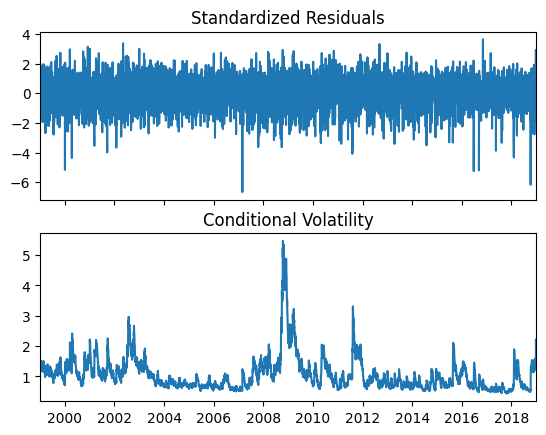

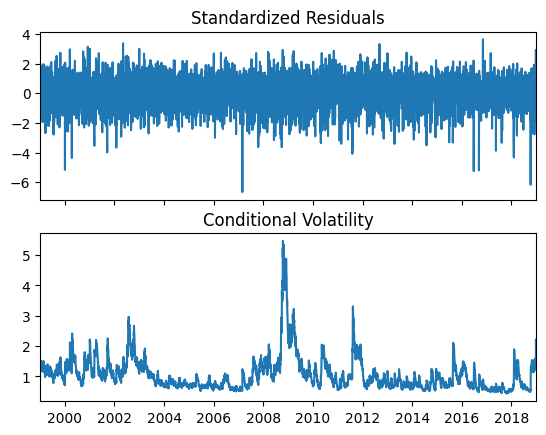

In [40]:
res.plot()

- Standardized Residuals
 - 뚜렷한 조건부 이분산성을 보여주는 부분이 사라짐
 - 즉, 모델 적합이 잘되었다는 의미

<br>

# 회고
이번에는 ARIMA와 ARCH 모델을 적용하는 방법을 실습했습니다.
<br>
특히 AirPassengers 데이터셋을 SARIMA를 통해서 예측해봤는데, 어제 실습했던 내용과 동일하게 데이터를 전처리 한다음 모델에 적용하고, 시각화하여 확인하면 되는 간단한 로직을 가지고 있어 코드 측면에서는 어렵지 않게 배울 수 있었어요.
<br>
<br>

하지만, ARIMA 파트에서 ACF 및 PACF의 유의미한 값의 기준이 다소 애매하게 정의되어 있어 조금 헷갈렸던 것 같습니다.
<br>
ACF에서는 음수값이 유의미하지 않다는 내용이 강의에 나와있어 더 혼란이 가중된 것 같아요.
<br>
그러면서도 동시에 PACF는 음수로 향하는 값들도 유의미한 것으로 해석해서 더 혼란스러웠습니다.
<br>
현재로서는 가장 유의미한 D 값이 12이기 때문에 약간의 잘못된 해석이 된 것이 아닐까 추측하면서 우선 넘어갔어요😅
<br>
시간이 걸리더라도 이유를 알게되면 좋겠습니다.
<br>
<br>
ARCH 모델 파트에서는, 최종 결과값을 어떻게 해석할 수 있는지에 대해 집중했습니다.
<br>
통계 모듈을 학습하면서 약간은 이게 왜 필요하지..?라고 생각했던 부분들에 대한 의심이 풀렸던 것 같아요.
<br>
통계적인 이유를 찾아야하는 모델에 대한 해석을 위해 기초적인 내용이 반드시 필요했다는 걸 알게 되었고, 이를 이용해 모델 적합이 잘 되었는지 해석해볼 수 있어서 흥미로웠습니다.
<br>
더 공부해서 파라미터 값도 잘 살펴보고 다르게 적용해서 비교도 해보고 싶어요..!
